In [58]:
import pandas as pd
from pathlib import Path
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data directory
DATA_DIR = Path(os.getcwd()).parent / 'data'

# load data
events = pd.read_csv(DATA_DIR / 'extreme_events.csv', sep=',', header=None, parse_dates=['Date'], names=["Event", "Date", "Event type"])
events = events.set_index('Date')
events.head()

,Event,Event type
Date,,
2016-04-22,Paris Agreement Signed,Climate Change Negotiations
2016-11-04,Paris Agreement Effective,Climate Change Negotiations
2017-06-01,Trump announces US leaving Paris Agreement,Climate Change Negotiations
2020-11-04,US officially leaves Paris Agreement,Climate Change Negotiations
2018-10-08,IPCC releases 1.5C report,Climate Change Negotiations


# Plotting

GME data has been used as a placeholder while Reddit data is still unavailable

The event labels are too big for the plot

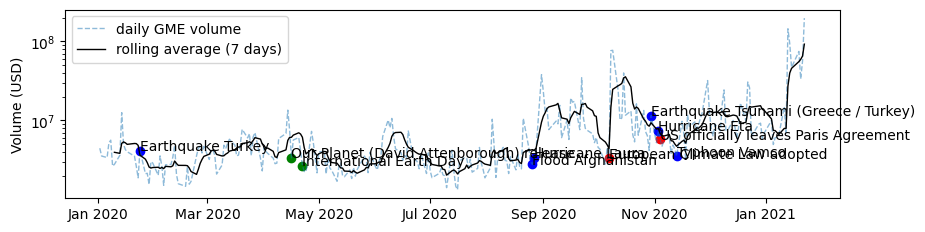

In [62]:
# determine data folder path
DATA_DIR = (os.sep).join(os.path.dirname(os.path.dirname(os.getcwd())).split(os.sep)+['data'])

# load GME data file
filename = 'GME.csv'
GME = pd.read_csv(f'{DATA_DIR}{os.sep}{filename}', parse_dates=['Date']).set_index('Date')

# show dataframe
GME.head()

# define plotting parameters

def setup_plt():
    mpl.rcParams['lines.linewidth'] = 1
    
setup_plt()

# compute weekly window
rolling_weekly_GME = GME.Volume.rolling(7).mean()

# setup figure
fig, ax = plt.subplots(figsize=((10,2.5)), dpi=100)
date_format = mpl.dates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel('Volume (USD)')
ax.set_yscale('log')

# plot time series
ax.plot(GME.index, GME.Volume, '--', alpha=0.5, label='daily GME volume')
ax.plot(rolling_weekly_GME.index, rolling_weekly_GME, 'k', label='rolling average (7 days)')
ax.legend()

# Creating merged plot for points
s1 = pd.merge(events, GME, how='inner', on=['Date'])

# Color dictionary
Colors = {' Climate Change Negotiations': 'red', 
         ' Natural Disasters': 'blue', 
         ' Climate Change Awareness': 'green'}


# Annotating and coloring each point
for i, txt in enumerate(s1.Event):
    ax.annotate(txt, (s1.index[i], s1.Volume[i]))
    ax.scatter(s1.index[i], s1.Volume[i], color=Colors[s1['Event type'][i]])
    #plt.scatter(X[i] , Y[i], color = my_colors.get(vocabulary[i], 'black'))

# show figure
plt.show()

In [60]:
s1 = pd.merge(events, GME, how='inner', on=['Date'])

In [61]:
s1.Volume

Date
2020-11-04     5807900
2020-10-07     3308600
2020-11-13     3535900
2020-01-24     4163600
2020-08-27     3384400
2020-10-30    11546900
2020-08-26     2779700
2020-11-03     7454500
2020-04-22     2677800
2020-04-16     3371900
Name: Volume, dtype: int64

In [54]:
import numpy as np
np.unique(events['Event type'])

array([' Climate Change Awareness', ' Climate Change Negotiations',
       ' Natural Disasters'], dtype=object)